<a href="https://colab.research.google.com/github/Sukshi-Gupta/GFGKIIT-spikers-Hyperthon/blob/main/heartDiseaseprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


file_paths = {
    "cleveland": '/cleveland.csv',
    "hungarian": '/hungarian.csv',
    "switzerland": '/switzerland.csv',
    "va": '/va.csv'
}


datasets = []
for name, path in file_paths.items():
    try:
        df = pd.read_csv(path, header=None)
        datasets.append(df)
        print(f"Loaded {name} dataset successfully!")
    except Exception as e:
        print(f"Error loading {name}: {e}")


data = pd.concat(datasets, ignore_index=True)


columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach",
    "exang", "oldpeak", "slope", "ca", "thal", "target"
]
data.columns = columns


data.replace(['', ' '], pd.NA, inplace=True)


data = data.apply(pd.to_numeric, errors='coerce')


imputer = SimpleImputer(strategy='mean')
data = pd.DataFrame(imputer.fit_transform(data), columns=columns)

X = data.drop("target", axis=1)
y = (data["target"] > 0).astype(int)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Loaded cleveland dataset successfully!
Loaded hungarian dataset successfully!
Loaded switzerland dataset successfully!
Loaded va dataset successfully!
Accuracy: 0.991162474507138

Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.09      0.13        11
           1       0.99      1.00      1.00      1460

    accuracy                           0.99      1471
   macro avg       0.62      0.54      0.56      1471
weighted avg       0.99      0.99      0.99      1471



In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.991162474507138

Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.09      0.13        11
           1       0.99      1.00      1.00      1460

    accuracy                           0.99      1471
   macro avg       0.62      0.54      0.56      1471
weighted avg       0.99      0.99      0.99      1471



In [9]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


y_pred_optimized = best_model.predict(X_test)
print("Optimized Model Accuracy:", accuracy_score(y_test, y_pred_optimized))


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Optimized Model Accuracy: 0.9918422841604351


In [11]:
import joblib


joblib.dump(best_model, "heart_disease_model.pkl")


loaded_model = joblib.load("heart_disease_model.pkl")


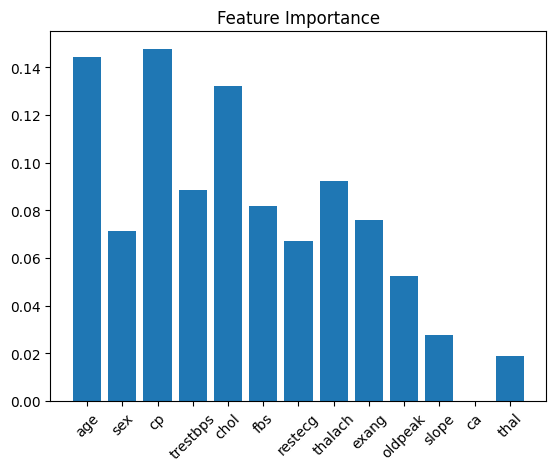

In [12]:
import matplotlib.pyplot as plt


importance = best_model.feature_importances_
plt.bar(columns[:-1], importance)
plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.show()


In [15]:
# Step 1: Disease Mapping
disease_mapping = {
    0: {
        "name": "No Disease",
        "cause": "Healthy condition with no significant heart-related issues.",
        "treatment": "Maintain a healthy lifestyle, regular exercise, and balanced diet."
    },
    1: {
        "name": "Coronary Artery Disease",
        "cause": "Narrowing or blockage of the coronary arteries, often caused by atherosclerosis.",
        "treatment": "Lifestyle changes, medications, or procedures like angioplasty or bypass surgery."
    },
    2: {
        "name": "Myocardial Infarction",
        "cause": "Heart attack caused by blood flow blockage to the heart muscle.",
        "treatment": "Immediate medical attention, medications, or surgery."
    },
    3: {
        "name": "Angina",
        "cause": "Chest pain due to reduced blood flow to the heart.",
        "treatment": "Medications to improve blood flow and reduce pain."
    },
    4: {
        "name": "Heart Failure",
        "cause": "Heart muscle weakness leading to inadequate blood pumping.",
        "treatment": "Medications, lifestyle changes, and in severe cases, heart transplantation."
    }
}


def predict_disease(details):
    """
    Predict the disease type based on user-provided details and provide relevant information.
    Args:
    details (dict): A dictionary containing user inputs for features.

    Returns:
    dict: Prediction result, disease name, causes, and treatments.
    """

    input_data = pd.DataFrame([details])


    input_scaled = scaler.transform(input_data)


    prediction = model.predict(input_scaled)[0]


    disease_info = disease_mapping.get(prediction, {
        "name": "Unknown",
        "cause": "Unknown",
        "treatment": "Unknown"
    })

    return {
        "Prediction": prediction,
        "Disease Name": disease_info["name"],
        "Cause": disease_info["cause"],
        "Treatment": disease_info["treatment"]
    }


user_input = {
    "age": 45,
    "sex": 1,
    "cp": 3,
    "trestbps": 500,
    "chol": 987,
    "fbs": 0,
    "restecg": 0,
    "thalach": 150,
    "exang": 0,
    "oldpeak": 1.2,
    "slope": 2,
    "ca": 0,
    "thal": 2
}


result = predict_disease(user_input)
print("Prediction Result:")
print(f"Disease Name: {result['Disease Name']}")
print(f"Cause: {result['Cause']}")
print(f"Treatment: {result['Treatment']}")


Prediction Result:
Disease Name: No Disease
Cause: Healthy condition with no significant heart-related issues.
Treatment: Maintain a healthy lifestyle, regular exercise, and balanced diet.


In [16]:

print("Classification Report on Test Data:\n")
print(classification_report(y_test, model.predict(X_test)))


Classification Report on Test Data:

              precision    recall  f1-score   support

           0       0.25      0.09      0.13        11
           1       0.99      1.00      1.00      1460

    accuracy                           0.99      1471
   macro avg       0.62      0.54      0.56      1471
weighted avg       0.99      0.99      0.99      1471



In [18]:
def predict_disease(details):
    """
    Predict the disease type based on user-provided details and provide relevant information.
    Args:
    details (dict): A dictionary containing user inputs for features.

    Returns:
    dict: Prediction result, disease name, causes, and treatments.
    """

    input_data = pd.DataFrame([details])


    missing_cols = set(X.columns) - set(input_data.columns)
    if missing_cols:
        raise ValueError(f"Missing columns in input data: {missing_cols}")


    input_scaled = scaler.transform(input_data)


    print("Scaled User Input:")
    print(input_scaled)


    prediction = model.predict(input_scaled)[0]


    disease_info = disease_mapping.get(prediction, {
        "name": "Unknown",
        "cause": "Unknown",
        "treatment": "Unknown"
    })

    return {
        "Prediction": prediction,
        "Disease Name": disease_info["name"],
        "Cause": disease_info["cause"],
        "Treatment": disease_info["treatment"]
    }


In [19]:
user_input = {
    "age": 45,
    "sex": 1,
    "cp": 3,
    "trestbps": 130,
    "chol": 245,
    "fbs": 0,
    "restecg": 0,
    "thalach": 150,
    "exang": 0,
    "oldpeak": 1.2,
    "slope": 2,
    "ca": 0,
    "thal": 2
}

result = predict_disease(user_input)
print("Prediction Result:")
print(f"Disease Name: {result['Disease Name']}")
print(f"Cause: {result['Cause']}")
print(f"Treatment: {result['Treatment']}")


Scaled User Input:
[[ -5.06290184   1.04512016  -3.76876325  -1.21006313   3.51357679
   -4.43870341  -6.38992448   8.32735605  -9.48612295  -0.79280833
   -1.69323819   0.         -50.54555365]]
Prediction Result:
Disease Name: No Disease
Cause: Healthy condition with no significant heart-related issues.
Treatment: Maintain a healthy lifestyle, regular exercise, and balanced diet.
